# **1. Perkenalan Dataset**


Dataset yang digunakan adalah TMDB 5000 Movie Dataset. Dataset ini terdiri dari dua file utama:

tmdb_5000_movies.csv: Berisi informasi detail tentang sekitar 5000 film, termasuk anggaran, genre, kata kunci, pendapatan, popularitas, tanggal rilis, rating, dll.
tmdb_5000_credits.csv: Berisi informasi kru dan pemain (cast) untuk setiap film, termasuk nama aktor, karakter,

Source:https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata


# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast


%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# **3. Memuat Dataset**

In [2]:
try:
    movies_df = pd.read_csv('tmdb_5000_movies.csv')
except FileNotFoundError:
    print("File 'tmdb_5000_movies.csv' tidak ditemukan. Pastikan file ada di direktori yang sama dengan notebook atau berikan path yang benar.")

try:
    credits_df = pd.read_csv('tmdb_5000_credits.csv')
except FileNotFoundError:
    print("File 'tmdb_5000_credits.csv' tidak ditemukan. Pastikan file ada di direktori yang sama dengan notebook atau berikan path yang benar.")


print("Movies Dataset Head:")
if 'movies_df' in locals():
    print(movies_df.head(2))

print("\nCredits Dataset Head:")
if 'credits_df' in locals():
    print(credits_df.head(2))

print("\nMovies Dataset Info:")
if 'movies_df' in locals():
    movies_df.info()

print("\nCredits Dataset Info:")
if 'credits_df' in locals():
    credits_df.info()

Movies Dataset Head:
      budget  \
0  237000000   
1  300000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                                                                                                                                                                                                                                                                                                                           

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
if 'movies_df' in locals() and 'credits_df' in locals():
    print(f"Kolom di movies_df: {movies_df.columns}")
    print(f"Kolom di credits_df: {credits_df.columns}")

    if 'id' in movies_df.columns and 'movie_id' in credits_df.columns:
        if 'title' in credits_df.columns and 'title' in movies_df.columns:
             credits_df = credits_df.drop('title', axis=1)

        df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id', how='inner')
        print("\nDataset setelah di-merge (beberapa baris pertama):")
        print(df.head(2))
        print("\nInfo dataset setelah di-merge:")
        df.info()
    else:
        print("Kolom 'id' atau 'movie_id' tidak ditemukan untuk proses merge.")
else:
    print("Dataframe movies_df atau credits_df belum terdefinisi.")

Kolom di movies_df: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Kolom di credits_df: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

Dataset setelah di-merge (beberapa baris pertama):
      budget  \
0  237000000   
1  300000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   

                                  

In [4]:
if 'df' in locals():
    print("\nStatistik Deskriptif (kolom numerik):")
    print(df.describe())

    print("\nJumlah nilai unik per kolom:")
    for col in df.columns:
        print(f"- {col}: {df[col].nunique()} nilai unik")

    print("\nCek nilai yang hilang (missing values) setelah merge:")
    print(df.isnull().sum())
else:
    print("DataFrame 'df' belum terdefinisi (merge mungkin belum berhasil).")


Statistik Deskriptif (kolom numerik):
             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count       movie_id  
count   4803.000000   4803.000000    4803.000000  
mean       6.092172    690.217989   57165.484281  
std        1.194612   1234.585891   88694.614033  
min        0.000000      0.000000       5.000000  
25%

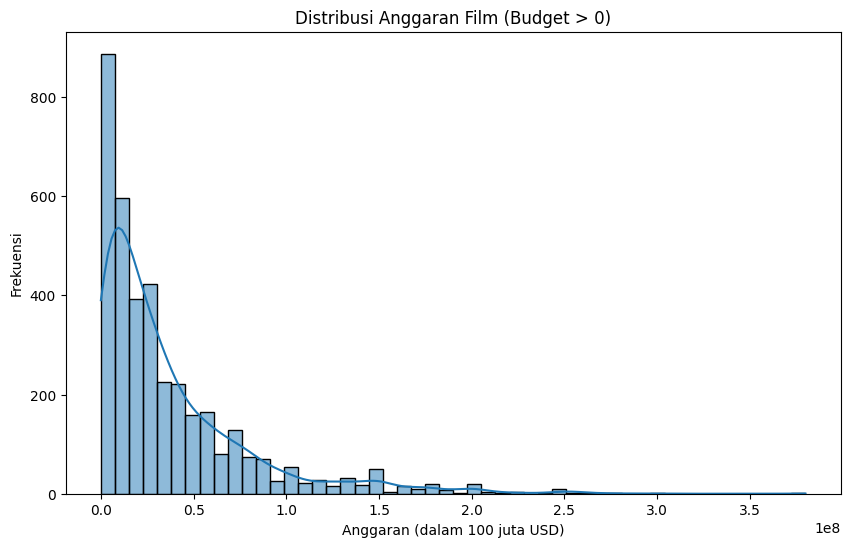

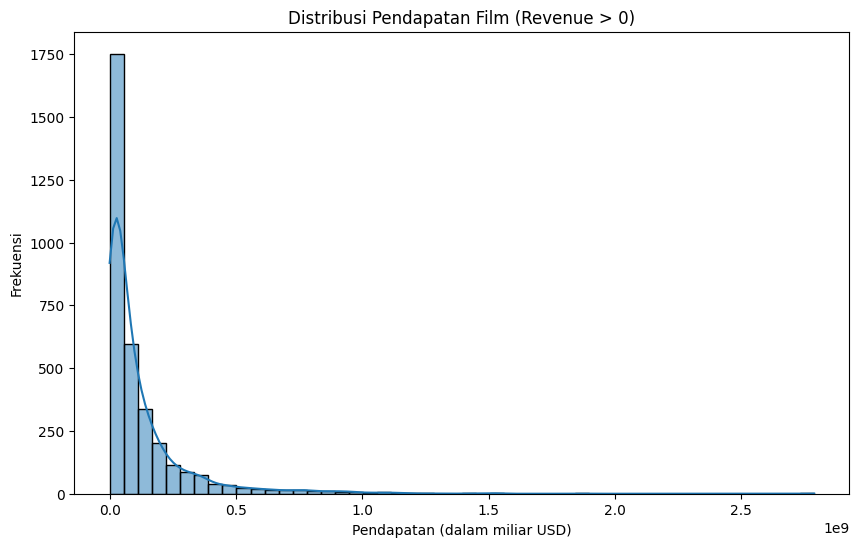

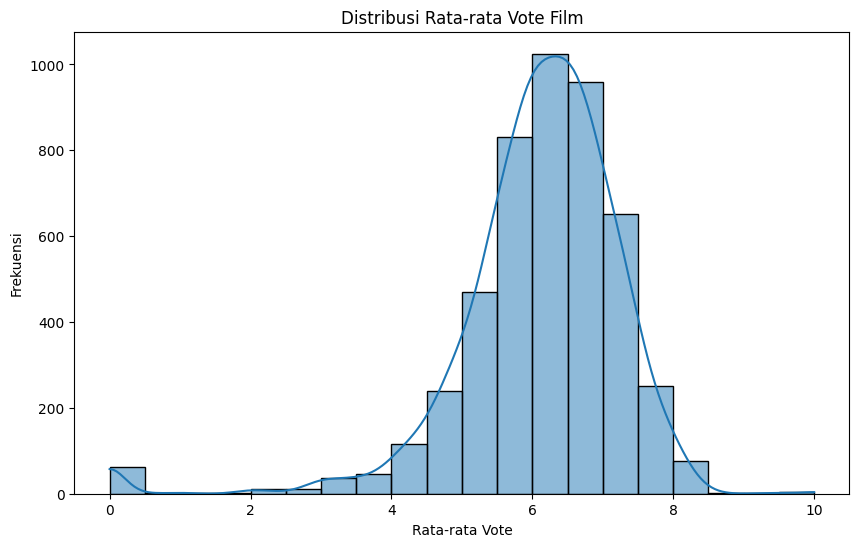

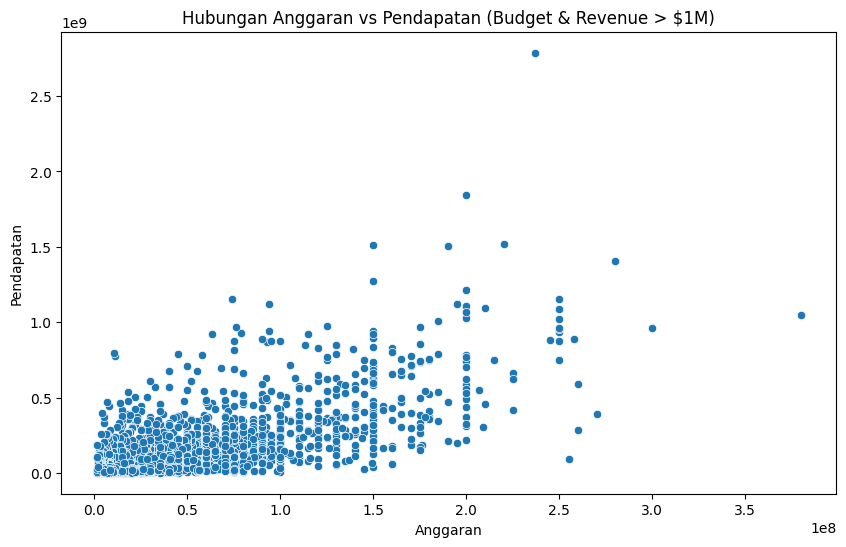

In [5]:
if 'df' in locals():

    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['budget'] > 0]['budget'], kde=True, bins=50)
    plt.title('Distribusi Anggaran Film (Budget > 0)')
    plt.xlabel('Anggaran (dalam 100 juta USD)')
    plt.ylabel('Frekuensi')
    plt.show()


    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['revenue'] > 0]['revenue'], kde=True, bins=50)
    plt.title('Distribusi Pendapatan Film (Revenue > 0)')
    plt.xlabel('Pendapatan (dalam miliar USD)')
    plt.ylabel('Frekuensi')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df['vote_average'], kde=True, bins=20)
    plt.title('Distribusi Rata-rata Vote Film')
    plt.xlabel('Rata-rata Vote')
    plt.ylabel('Frekuensi')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='budget', y='revenue', data=df[ (df['budget'] > 1000000) & (df['revenue'] > 1000000) ])
    plt.title('Hubungan Anggaran vs Pendapatan (Budget & Revenue > $1M)')
    plt.xlabel('Anggaran')
    plt.ylabel('Pendapatan')
    plt.show()
else:
    print("DataFrame 'df' belum terdefinisi.")

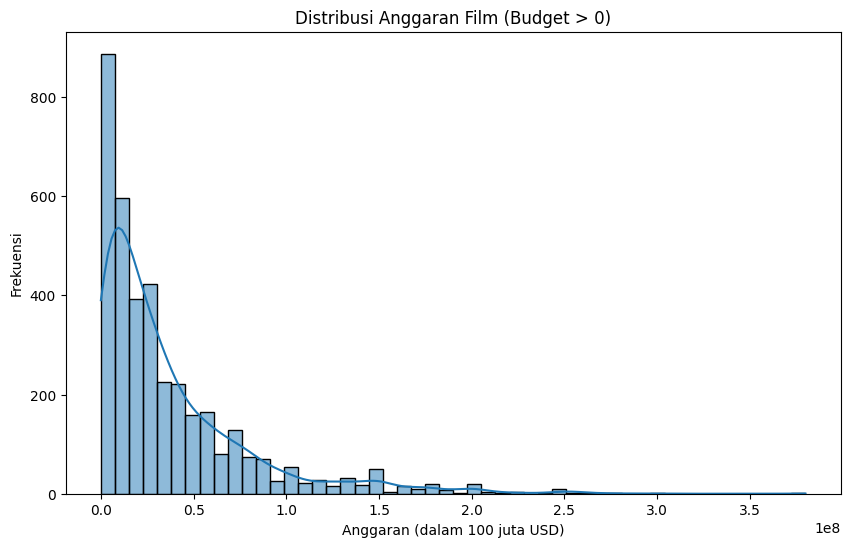

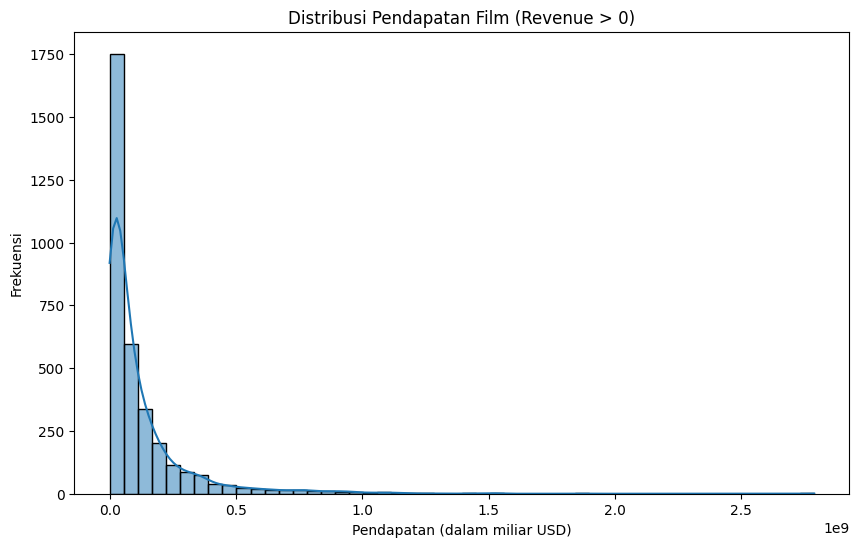

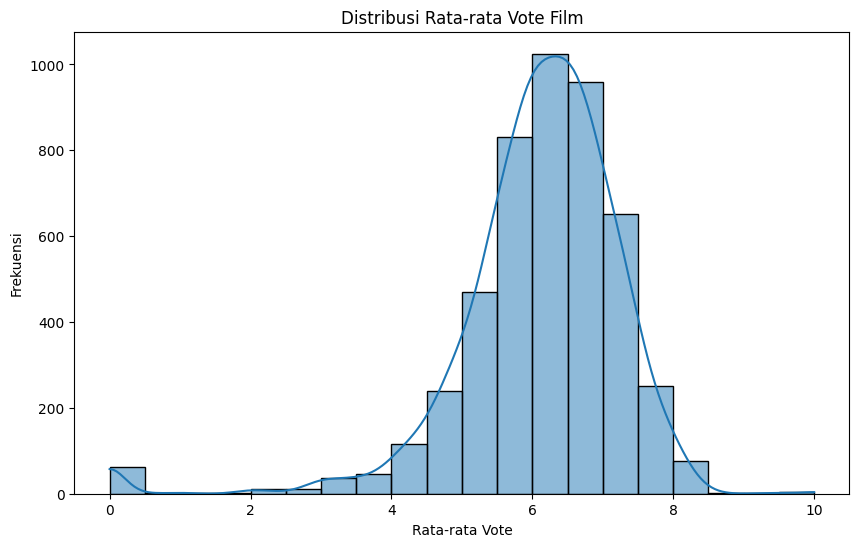

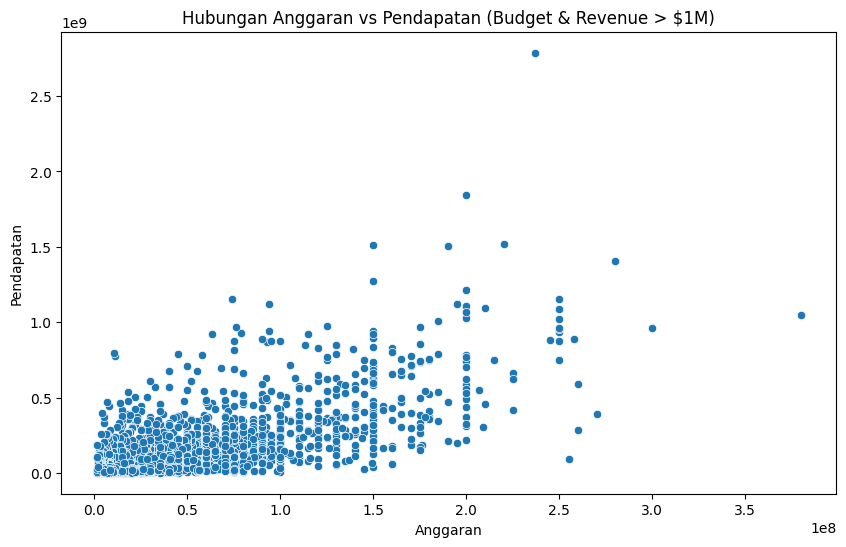

In [6]:
if 'df' in locals():
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['budget'] > 0]['budget'], kde=True, bins=50)
    plt.title('Distribusi Anggaran Film (Budget > 0)')
    plt.xlabel('Anggaran (dalam 100 juta USD)')
    plt.ylabel('Frekuensi')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['revenue'] > 0]['revenue'], kde=True, bins=50)
    plt.title('Distribusi Pendapatan Film (Revenue > 0)')
    plt.xlabel('Pendapatan (dalam miliar USD)')
    plt.ylabel('Frekuensi')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df['vote_average'], kde=True, bins=20)
    plt.title('Distribusi Rata-rata Vote Film')
    plt.xlabel('Rata-rata Vote')
    plt.ylabel('Frekuensi')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='budget', y='revenue', data=df[ (df['budget'] > 1000000) & (df['revenue'] > 1000000) ]) # filter agar lebih jelas
    plt.title('Hubungan Anggaran vs Pendapatan (Budget & Revenue > $1M)')
    plt.xlabel('Anggaran')
    plt.ylabel('Pendapatan')
    plt.show()

else:
    print("DataFrame 'df' belum terdefinisi.")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
def parse_json_like_column(column_str):
    """
    Helper function untuk mem-parse string yang mirip JSON.
    Menggunakan ast.literal_eval karena lebih aman daripada eval() untuk string Python.
    """
    try:
        return ast.literal_eval(column_str)
    except (ValueError, SyntaxError, TypeError):
        return []

if 'df' in locals():
    json_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew']
    for col in json_columns:
        if col in df.columns:
            print(f"Memproses kolom: {col}")
            df[col] = df[col].apply(lambda x: parse_json_like_column(x) if isinstance(x, str) else [])
        else:
            print(f"Kolom {col} tidak ditemukan dalam DataFrame.")


    def get_director(crew_list):
        if not isinstance(crew_list, list):
            return None
        for member in crew_list:
            if isinstance(member, dict) and member.get('job') == 'Director':
                return member.get('name')
        return None

    if 'crew' in df.columns:
        df['director'] = df['crew'].apply(get_director)
        print("\nSutradara (contoh):")
        print(df[['title', 'director']].head())
    else:
        print("Kolom 'crew' tidak ditemukan untuk ekstraksi sutradara.")

else:
    print("DataFrame 'df' belum terdefinisi.")

Memproses kolom: genres
Memproses kolom: keywords
Memproses kolom: production_companies
Memproses kolom: production_countries
Memproses kolom: spoken_languages
Memproses kolom: cast
Memproses kolom: crew

Sutradara (contoh):
                                      title           director
0                                    Avatar      James Cameron
1  Pirates of the Caribbean: At World's End     Gore Verbinski
2                                   Spectre         Sam Mendes
3                     The Dark Knight Rises  Christopher Nolan
4                               John Carter     Andrew Stanton


In [8]:
if 'df' in locals():
    print("\nMissing values sebelum penanganan:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

    if 'runtime' in df.columns:
        df['runtime'].fillna(df['runtime'].mean(), inplace=True)

    for col in ['homepage', 'tagline', 'overview']:
        if col in df.columns:
            df[col].fillna('', inplace=True)

    if 'director' in df.columns:
        df['director'].fillna('Unknown', inplace=True)
    print("\nMissing values setelah penanganan (contoh):")
    print(df.isnull().sum()[df.isnull().sum() > 0])
else:
    print("DataFrame 'df' belum terdefinisi.")


Missing values sebelum penanganan:
homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
director          30
dtype: int64

Missing values setelah penanganan (contoh):
release_date    1
dtype: int64


<ipython-input-8-941a8fc82e28>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].fillna(df['runtime'].mean(), inplace=True)
<ipython-input-8-941a8fc82e28>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [9]:
if 'df' in locals():
    print(f"\nJumlah baris sebelum menghapus duplikat: {len(df)}")
    df.drop_duplicates(subset=['id'], keep='first', inplace=True)
    print(f"Jumlah baris setelah menghapus duplikat berdasarkan 'id': {len(df)}")
else:
    print("DataFrame 'df' belum terdefinisi.")


Jumlah baris sebelum menghapus duplikat: 4803
Jumlah baris setelah menghapus duplikat berdasarkan 'id': 4803


In [10]:
if 'df' in locals():
    if 'release_date' in df.columns:
        df.dropna(subset=['release_date'], inplace=True)
        df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
        df['release_year'] = df['release_date'].dt.year
        df['release_month'] = df['release_date'].dt.month
        print("\nInfo setelah konversi release_date:")
        df[['title', 'release_date', 'release_year']].head()
    else:
        print("Kolom 'release_date' tidak ditemukan.")
else:
    print("DataFrame 'df' belum terdefinisi.")


Info setelah konversi release_date:


In [11]:
if 'df' in locals():
    try:
        # Buat folder jika belum ada
        import os
        output_dir = 'namadataset_preprocessing'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)


        columns_to_save = [
            'id', 'title', 'budget', 'revenue', 'runtime', 'popularity',
            'vote_average', 'vote_count', 'release_year', 'release_month',
            'overview', 'tagline', 'homepage',
            'director'
        ]

        if 'genres' in df.columns:
             df['genres_processed'] = df['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) and x else [])
             if 'genres_processed' not in columns_to_save: columns_to_save.append('genres_processed')


        final_columns_to_save = [col for col in columns_to_save if col in df.columns]

        df_processed = df[final_columns_to_save]

        output_path = os.path.join(output_dir, 'tmdb_movies_processed.csv')
        df_processed.to_csv(output_path, index=False)
        print(f"\nDataset yang sudah diproses disimpan ke: {output_path}")
        print(df_processed.head())
        print(df_processed.info())

    except Exception as e:
        print(f"Error saat menyimpan file: {e}")
else:
    print("DataFrame 'df' belum terdefinisi, tidak ada yang disimpan.")


Dataset yang sudah diproses disimpan ke: namadataset_preprocessing/tmdb_movies_processed.csv
       id                                     title     budget     revenue  \
0   19995                                    Avatar  237000000  2787965087   
1     285  Pirates of the Caribbean: At World's End  300000000   961000000   
2  206647                                   Spectre  245000000   880674609   
3   49026                     The Dark Knight Rises  250000000  1084939099   
4   49529                               John Carter  260000000   284139100   

   runtime  popularity  vote_average  vote_count  release_year  release_month  \
0    162.0  150.437577           7.2       11800          2009             12   
1    169.0  139.082615           6.9        4500          2007              5   
2    148.0  107.376788           6.3        4466          2015             10   
3    165.0  112.312950           7.6        9106          2012              7   
4    132.0   43.926995          